In [2]:
import numpy as np

# def normalize_data(X):
#     """ Нормализует данные X по столбцам (признакам). """
#     mean = np.mean(X, axis=0)
#     std = np.std(X, axis=0)
#     return (X - mean) / std


In [53]:
def dist_matr(X_train:np.array, X_test:np.array, dist_type="d2"):
    if dist_type == "d2":
        # print(points)
        squared_norms_obych = np.sum(X_train ** 2, axis=1).reshape(-1, 1)
        squared_norms_predict = np.sum(X_test ** 2, axis=1).reshape(-1, 1)

        # print(f"{squared_norms_obych=}")
        # print(f"{squared_norms_predict=}")

        # print(squared_norms)
        # dist_matrix = np.sqrt((squared_norms + squared_norms.T) - 2 * points @ points.T)
        # print(f"{(2 * squared_norms_obych @ squared_norms_predict.T)=}")
        dist_matrix = (squared_norms_predict + squared_norms_obych.T) - (2 * (X_test @ X_train.T))
        # print(dist_matrix)
    # elif dist_type == "d1":
    #     single_norm = np.sum(points, axis=1).reshape(-1, 1)
    #     dist_matrix = np.abs(single_norm - single_norm.T)
    else:
        raise Exception("Метод не добавлен")
    return dist_matrix


In [54]:
X = np.array([[1,2],[2,3], [3,4]])
y  = np.array([[1,2], [3,4]])

print(dist_matr(X, y))

X = np.array([[1,2,3], [2,3,4], [5,5,5]])
y = np.array([1,2,3])

[[0 2 8]
 [8 2 0]]


In [82]:
def gaussian_kernel(distance, bandwidth):
    """ Гауссово ядро с переменной шириной (ширина окна — bandwidth). """
    bandwidth = bandwidth.reshape(-1, 1)
    return np.exp(- (distance ** 2) / (2 * bandwidth ** 2))


In [106]:
def find_winning_class(weights, labels, num_classes):
    num_rows = weights.shape[0]


    # Создаем матрицу для накопления весов для каждого класса
    class_weight_sums = np.zeros((num_rows, num_classes))

    # Суммируем веса по классам
    np.add.at(class_weight_sums, (np.arange(num_rows)[:, None], labels), weights)

    # Находим индексы классов с максимальной суммой весов для каждой строки
    winning_classes = np.argmax(class_weight_sums, axis=1)
    
    return winning_classes

def knn_predict(X_train, y_train, X_test, k):
    """ KNN с окном Парзена и переменной шириной окна для одного тестового примера. """
    distances = dist_matr(X_train, X_test)
    # print(f"{distances.shape=}")
    sorted_indices_per_point = np.argsort(distances, axis=1)
    # print(sorted_indices_per_point)
    k_nearest_indices = sorted_indices_per_point[:, :k+1]

    # print(f"{k_nearest_indices=}")
    # k_nearest_distances = distances[k_nearest_indices]
    k_nearest_distances = distances[np.arange(distances.shape[0])[:, None], k_nearest_indices]
    # print(f"{k_nearest_distances.shape}")
    k_nearest_labels = y_train[k_nearest_indices[:, :-1]]
    # print(f"{np.unique(k_nearest_labels, return_counts=True, axis=1)=}")
    
    # Используем расстояние до k-го соседа как ширину окна
    bandwidth = k_nearest_distances[:, -1]
    
    # Рассчитываем веса с помощью гауссова ядра
    # print(f"{k_nearest_distances[:, :-1]=}")
    # print(f"{bandwidth=}")

    weights = gaussian_kernel(k_nearest_distances[:, :-1], bandwidth)

    unique_labels = np.unique(y_train)

        # Классификация по взвешенному голосованию

    k_sosed_weight = weights * k_nearest_distances[:, :-1]
    # print(f"{k_sosed_weight=}")
    # print(f"{k_nearest_labels=}")

    

    return find_winning_class(weights=k_sosed_weight, labels=k_nearest_labels, num_classes=unique_labels.shape[0])



np.random.seed(42)
X = np.random.rand(1000, 2)  # Пример случайных данных (100 точек, 2 признака)
y = np.random.randint(0, 4, 1000)  # Пример случайных меток классов (0 или 1)

# Разделим данные на тренировочные и тестовые
train_size = 80
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Оцениваем точность нашей реализации
knn_predict(X_train, y_train, X_test, 5)

array([3, 3, 1, 0, 3, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 2, 2, 3, 0, 0, 1, 2,
       1, 3, 1, 1, 2, 1, 1, 3, 3, 3, 2, 2, 2, 2, 1, 3, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 3, 2, 2, 1, 3, 0, 3, 2, 1, 0, 1, 3, 0, 0, 0, 1, 1, 1, 1,
       0, 3, 0, 1, 3, 0, 0, 3, 2, 0, 2, 3, 0, 1, 1, 1, 0, 3, 2, 3, 1, 1,
       3, 2, 1, 0, 1, 1, 1, 0, 1, 3, 3, 1, 3, 1, 0, 0, 0, 1, 1, 1, 2, 2,
       3, 3, 0, 0, 0, 2, 3, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 3, 3, 1, 3,
       3, 0, 0, 1, 3, 1, 2, 1, 2, 0, 0, 3, 0, 3, 0, 3, 3, 1, 3, 3, 2, 0,
       3, 2, 1, 3, 3, 0, 3, 1, 1, 2, 0, 1, 0, 0, 3, 0, 1, 3, 2, 0, 0, 0,
       0, 1, 3, 0, 3, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 3, 0, 0, 3, 2,
       1, 3, 1, 1, 3, 3, 0, 0, 1, 0, 2, 0, 0, 3, 1, 1, 1, 0, 2, 2, 2, 0,
       1, 0, 0, 3, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 3, 0, 3, 0, 1, 1, 2, 2,
       2, 3, 2, 3, 3, 2, 1, 3, 0, 2, 1, 0, 2, 2, 3, 0, 3, 0, 0, 3, 1, 1,
       3, 1, 0, 3, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 0, 1, 1, 0, 3, 0,
       1, 0, 3, 0, 3, 3, 3, 3, 2, 2, 0, 0, 3, 0, 1,

In [107]:
def loo_cross_validation(X, y, k_values):
    """ Подбор параметра k методом скользящего контроля (LOO). """
    n = len(y)
    dimension = X.shape[1]
    loo_errors = np.zeros(len(k_values))
    
    for i in range(n):
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)
        X_test = X[i].reshape(-1, dimension)
        y_true = y[i]
        
        for j, k in enumerate(k_values):
            # print(X_train.shape, y_train.shape, X_test.shape)
            y_pred = knn_predict(X_train, y_train, X_test, k)
            if y_pred != y_true:
                loo_errors[j] += 1
    
    loo_errors /= n  # Нормализуем на количество примеров
    return loo_errors


In [96]:
import matplotlib.pyplot as plt

def plot_risk(k_values, loo_errors):
    """ Строит график эмпирического риска в зависимости от k. """
    plt.plot(k_values, loo_errors, marker='o')
    plt.title('Эмпирический риск в зависимости от k')
    plt.xlabel('k')
    plt.ylabel('Ошибка LOO')
    plt.grid(True)
    plt.show()


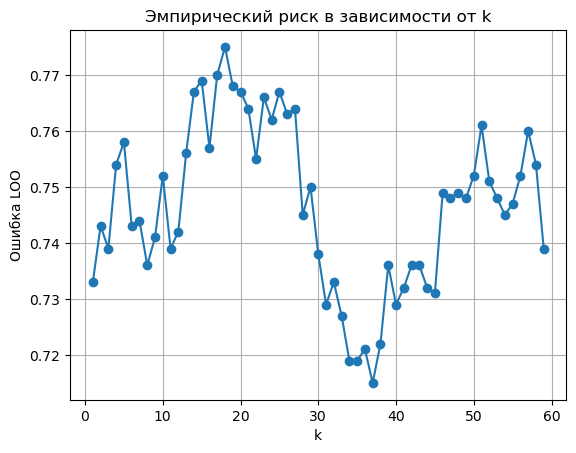

Оптимальное значение k: 37


In [108]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
# Функции, определённые выше
# normalize_data, euclidean_distance, gaussian_kernel, knn_predict, loo_cross_validation, plot_risk

# Генерируем или загружаем данные
X = np.random.rand(1000, 2)  # Пример случайных данных (100 точек, 2 признака)
y = np.random.randint(0, 4, 1000)  # Пример случайных меток классов (0 или 1)


# Нормализация данных
# X_normalized = normalize_data(X)

# Подбор оптимального k с использованием LOO
k_values = range(1, 60)  # Проверим значения k от 1 до 20
loo_errors = loo_cross_validation(X, y, k_values)

# Построение графика эмпирического риска
plot_risk(k_values, loo_errors)

# Оптимальное значение k
optimal_k = k_values[np.argmin(loo_errors)]
print(f'Оптимальное значение k: {optimal_k}')


In [110]:
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Функции из предыдущей реализации (normalize_data, knn_predict, loo_cross_validation и т.д.)

# Сгенерируем данные
np.random.seed(42)
X = np.random.rand(1000, 2)  # Пример случайных данных (100 точек, 2 признака)
y = np.random.randint(0, 4, 1000)  # Пример случайных меток классов (0 или 1)

# Нормализуем данные
# X_normalized = normalize_data(X)

# --- Сравнение качества работы ---

# Параметры для сравнения
k = 37  # Возьмем фиксированное значение k

# Наша реализация KNN с окном Парзена
def knn_accuracy_custom(X_train, y_train, X_test, y_test, k):
    correct_predictions = 0
    y_pred = knn_predict(X_train, y_train, X_test, k)
    correct_predictions = np.sum(y_pred == y_test)
    return correct_predictions / len(X_test)

# Разделим данные на тренировочные и тестовые
train_size = 80
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Оцениваем точность нашей реализации
knn_predict(X_train, y_train, X_test, k)
custom_accuracy = knn_accuracy_custom(X_train, y_train, X_test, y_test, k)
print(f"Точность нашей реализации KNN: {custom_accuracy:.4f}")

# Используем sklearn для эталонного KNN
knn_sklearn = KNeighborsClassifier(n_neighbors=k)

# Оцениваем точность sklearn KNN с кросс-валидацией
knn_sklearn.fit(X_train, y_train)
sklearn_accuracy = knn_sklearn.score(X_test, y_test)
print(f"Точность реализации KNN в sklearn: {sklearn_accuracy:.4f}")

# --- Сравнение времени работы ---

# Время работы нашей реализации
start_time_custom = time.time()
knn_accuracy_custom(X_train, y_train, X_test, y_test, k)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom
print(f"Время работы нашей реализации: {custom_time:.4f} секунд")

# Время работы sklearn реализации
start_time_sklearn = time.time()
knn_sklearn.predict(X_test)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn
print(f"Время работы реализации в sklearn: {sklearn_time:.4f} секунд")


Точность нашей реализации KNN: 0.2717
Точность реализации KNN в sklearn: 0.2685
Время работы нашей реализации: 0.0040 секунд
Время работы реализации в sklearn: 0.0240 секунд
